# Ejercicios: Tokenización, Part Of Speech, Lematización, WordCloud
Procesar los textos siguientes siguiendo los pasos indicados al final.

## Texto (Noticia):
The government has announced new measures to combat climate change. These measures include reducing carbon emissions and promoting renewable energy sources. The initiative aims to achieve net-zero emissions by 2050. Experts believe that these steps are crucial for the sustainability of our planet. The public is encouraged to participate in various programs to support this cause.

## Texto (Twitter):
Just watched an amazing football match! ⚽️ #Sports #Football @TeamA

Can't believe how good the game was last night! #Exciting @TeamB

The team played exceptionally well and deserved the win. #Victory 🏆

Feeling inspired after that match! #Motivation #SportsLife

What a goal by @Player1! Absolutely stunning! #GoalOfTheSeason


## Texto (Reseña de producto):
This phone is absolutely    fantastic . . . The camera quality is outstanding , and the battery life lasts all day . . . The screen is bright and clear!!! >.< ,                    making it perfect for watching videos . . . The performance is smooth and fast , even with multiple apps running . . . Highly recommended for anyone looking for a new smartphone . . . The design is sleek and modern , and the build quality is top - notch . . . Customer service was also very helpful when I had questions about the features . . .  :DD

## Texto (Blog):
Today, we are going to discuss the importance of daily meditation. Meditation can help reduce stress and improve concentration. By setting aside just a few minutes each day, you can experience significant benefits. Regular practice can lead to a calmer mind and a more focused outlook on life. Start your meditation journey today and see the positive changes it brings. Many people find that meditation helps them to be more present and mindful in their daily activities. It can also improve sleep quality and overall well-being.

## Texto (Conversación de WhatsApp):
Alice: Hey, are we still on for dinner tonight ? ?

Bob: Yes, definitely ! ! What time should we meet ?

Alice: How about 7 PM at the new Italian place downtown ?

Bob: Sounds perfect ! I've heard great things about their pasta . . .

Alice: Me too ! ! Can't wait to try it . . . See you there !

Bob: See you ! 😊

## Pasos de Procesamiento:
1. Limpieza y normalización del texto: Eliminar espacios extras y signos de puntuación incorrectos.
2. Tokenización del texto: Dividir el texto en palabras individuales.
3. Eliminación de stop words: Filtrar palabras comunes que no aportan mucho significado.
4. Extracción del Part-of-Speech (POS): Etiquetar cada palabra con su categoría gramatical y añadirlo como columna en el DataFrame.
5. Lematización de las palabras y añadirlas como columna en el DataFrame.
6. Extracción de palabras especiales: Crear un nuevo DataFrame con emoticonos, hashtags, referencias, fechas, horas, etc.
7. Mostrar un WordCloud: Generar una nube de palabras basada en la frecuencia de las palabras (después de eliminar stop words).

# Codigo

In [1]:
pip install nltk

In [7]:
#General Imports
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import re
nltk.download("punkt_tab")
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Codigo Texto (Noticia)

           Palabra      Lematizada  POS
0       government      government   NN
1        announced       announced  VBD
2              new             new   JJ
3         measures         measure  NNS
4           combat          combat  VBP
5          climate         climate   NN
6           change          change   NN
7         measures         measure  NNS
8          include         include  VBP
9         reducing        reducing  VBG
10          carbon          carbon   NN
11       emissions        emission  NNS
12       promoting       promoting  VBG
13       renewable       renewable   JJ
14          energy          energy   NN
15         sources          source  NNS
16      initiative      initiative  VBP
17            aims             aim  NNS
18         achieve         achieve  VBP
19         netzero         netzero   CD
20       emissions        emission  NNS
21            2050            2050   CD
22         experts          expert  NNS
23         believe         believe  VBP


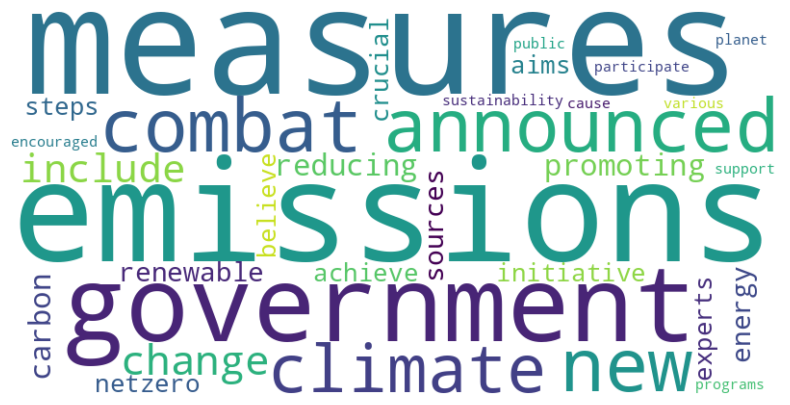

In [8]:
# Texto
texto = """
The government has announced new measures to combat climate change. These measures include reducing carbon emissions and promoting renewable energy sources. The initiative aims to achieve net-zero emissions by 2050. Experts believe that these steps are crucial for the sustainability of our planet. The public is encouraged to participate in various programs to support this cause.
"""

# 1. Limpieza y normalización del texto
def limpiar_texto(texto):
    texto = texto.lower()  # Convertir a minúsculas
    texto = re.sub(r'[^\w\s]', '', texto)  # Eliminar signos de puntuación
    return texto

texto_limpio = limpiar_texto(texto)

# 2. Tokenización del texto
tokens = word_tokenize(texto_limpio)

# 3. Eliminación de stop words
stop_words = set(stopwords.words('english'))
tokens_sin_stopwords = [word for word in tokens if word not in stop_words]

# 4. Extracción del Part-of-Speech (POS)
pos_tags = pos_tag(tokens_sin_stopwords)

# 5. Lemmatización de las palabras y mostrar el DataFrame
lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(word) for word in tokens_sin_stopwords]

df_lemmatized = pd.DataFrame({
    "Palabra": tokens_sin_stopwords,
    "Lematizada": lemmatized_words,
    "POS": [tag for _, tag in pos_tags]
})
print(df_lemmatized)

# 6. Extracción de palabras especiales (en este caso, palabras clave como "renewable" o "energy")
palabras_clave = [word for word in tokens_sin_stopwords if word in ['renewable', 'energy', 'climate', 'change']]
df_palabras_clave = pd.DataFrame({
    "Palabras Clave": palabras_clave
})
print(df_palabras_clave)

# 7. Mostrar un WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(tokens_sin_stopwords))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## Codigo Texto (Twitter)

Lematización y POS:
            Palabra       Lematizada  POS
0           watched          watched  VBN
1           amazing          amazing  VBG
2          football         football   NN
3             match            match   NN
4                 #                #    #
5            sports            sport  NNS
6                 #                #    #
7          football         football   NN
8                 @                @  NNP
9             teama            teama   NN
10             cant             cant   NN
11          believe          believe  VBP
12             good             good   JJ
13             game             game   NN
14             last             last   JJ
15            night            night   NN
16                #                #    #
17         exciting         exciting  VBG
18                @                @  NNP
19            teamb            teamb   NN
20             team             team   NN
21           played           played  VBD
22    exceptio

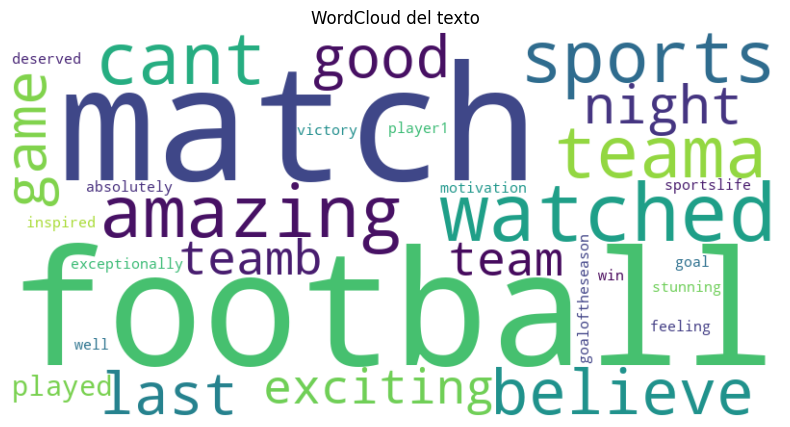

In [9]:
# Texto
texto = """
Just watched an amazing football match! ⚽️ #Sports #Football @TeamA
Can't believe how good the game was last night! #Exciting @TeamB
The team played exceptionally well and deserved the win. #Victory 🏆
Feeling inspired after that match! #Motivation #SportsLife
What a goal by @Player1! Absolutely stunning! #GoalOfTheSeason
"""

# 1. Limpieza y normalización del texto
def limpiar_texto(texto):
    texto = texto.lower()  # Convertir a minúsculas
    texto = re.sub(r'[^\w\s@#]', '', texto)  # Eliminar signos de puntuación, exceptuando hashtags y menciones
    return texto

texto_limpio = limpiar_texto(texto)

# 2. Tokenización del texto
tokens = word_tokenize(texto_limpio)

# 3. Eliminación de stop words
stop_words = set(stopwords.words('english'))
tokens_sin_stopwords = [word for word in tokens if word not in stop_words]

# 4. Extracción del Part-of-Speech (POS)
pos_tags = pos_tag(tokens_sin_stopwords)

# 5. Lemmatización de las palabras y mostrar el DataFrame
lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(word) for word in tokens_sin_stopwords]

df_lemmatized = pd.DataFrame({
    "Palabra": tokens_sin_stopwords,
    "Lematizada": lemmatized_words,
    "POS": [tag for _, tag in pos_tags]
})
print("Lematización y POS:")
print(df_lemmatized)

# 6. Extracción de hashtags, menciones y palabras clave
hashtags = [word for word in tokens if word.startswith('#')]
menciones = [word for word in tokens if word.startswith('@')]
palabras_clave = [word for word in tokens_sin_stopwords if word in ['football', 'match', 'goal', 'team', 'win']]

df_palabras_especiales = pd.DataFrame({
    "Hashtags": pd.Series(hashtags),
    "Menciones": pd.Series(menciones),
    "Palabras Clave": pd.Series(palabras_clave)
})
print("\nPalabras especiales:")
print(df_palabras_especiales)

# 7. Mostrar un WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(tokens_sin_stopwords))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud del texto")
plt.show()

## Codigo Texto (Reseña de producto)

Lematización y POS:
        Palabra   Lematizada  POS
0         phone        phone   NN
1    absolutely   absolutely   RB
2     fantastic    fantastic   JJ
3        camera       camera   NN
4       quality      quality   NN
5   outstanding  outstanding   JJ
6       battery      battery   NN
7          life         life   NN
8         lasts         last  VBZ
9           day          day   NN
10       screen       screen   JJ
11       bright       bright   JJ
12        clear        clear   JJ
13       making       making  VBG
14      perfect      perfect   JJ
15     watching     watching  VBG
16       videos        video   JJ
17  performance  performance   NN
18       smooth       smooth  VBD
19         fast         fast   RB
20         even         even   RB
21     multiple     multiple   JJ
22         apps         apps   IN
23      running      running  VBG
24       highly       highly   RB
25  recommended  recommended  VBN
26       anyone       anyone   NN
27      looking      looking

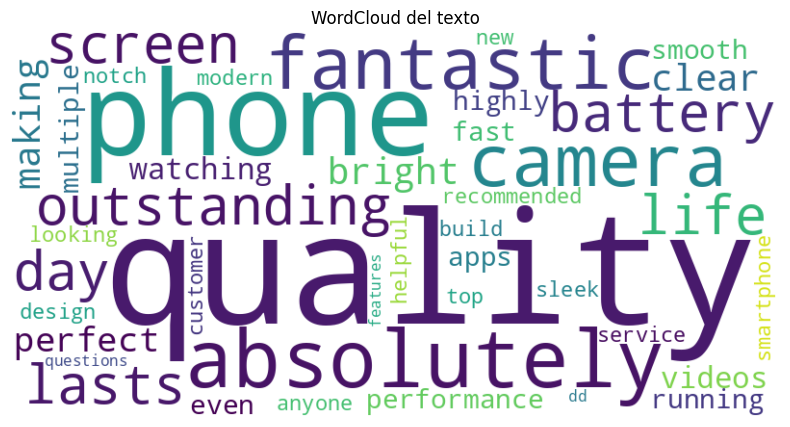

In [10]:
# Texto
texto = """
This phone is absolutely fantastic . . . The camera quality is outstanding , and the battery life lasts all day . . . The screen is bright and clear!!! >.< , making it perfect for watching videos . . . The performance is smooth and fast , even with multiple apps running . . . Highly recommended for anyone looking for a new smartphone . . . The design is sleek and modern , and the build quality is top - notch . . . Customer service was also very helpful when I had questions about the features . . . :DD
"""

# 1. Limpieza y normalización del texto
def limpiar_texto(texto):
    texto = texto.lower()  # Convertir a minúsculas
    texto = re.sub(r'[^\w\s]', '', texto)  # Eliminar signos de puntuación
    return texto

texto_limpio = limpiar_texto(texto)

# 2. Tokenización del texto
tokens = word_tokenize(texto_limpio)

# 3. Eliminación de stop words
stop_words = set(stopwords.words('english'))
tokens_sin_stopwords = [word for word in tokens if word not in stop_words]

# 4. Extracción del Part-of-Speech (POS)
pos_tags = pos_tag(tokens_sin_stopwords)

# 5. Lemmatización de las palabras y mostrar el DataFrame
lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(word) for word in tokens_sin_stopwords]

df_lemmatized = pd.DataFrame({
    "Palabra": tokens_sin_stopwords,
    "Lematizada": lemmatized_words,
    "POS": [tag for _, tag in pos_tags]
})
print("Lematización y POS:")
print(df_lemmatized)

# 6. Extracción de palabras clave relevantes (adjetivos y sustantivos)
palabras_clave = [word for word, tag in pos_tags if tag in ['JJ', 'NN', 'NNS']]  # Adjetivos y sustantivos

df_palabras_clave = pd.DataFrame({
    "Palabras Clave": palabras_clave
})
print("\nPalabras clave relevantes:")
print(df_palabras_clave)

# 7. Mostrar un WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(tokens_sin_stopwords))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud del texto")
plt.show()

## Codigo Texto (Blog)

Lematización y POS:
          Palabra     Lematizada  POS
0           today          today   NN
1           going          going  VBG
2         discuss         discus   JJ
3      importance     importance   NN
4           daily          daily   JJ
5      meditation     meditation   NN
6      meditation     meditation   NN
7            help           help   NN
8          reduce         reduce   VB
9          stress         stress   NN
10        improve        improve   VB
11  concentration  concentration   NN
12        setting        setting  VBG
13          aside          aside   JJ
14        minutes         minute  NNS
15            day            day   NN
16     experience     experience   NN
17    significant    significant   JJ
18       benefits        benefit  NNS
19        regular        regular   JJ
20       practice       practice   NN
21           lead           lead   NN
22         calmer         calmer   NN
23           mind           mind   NN
24        focused        focus

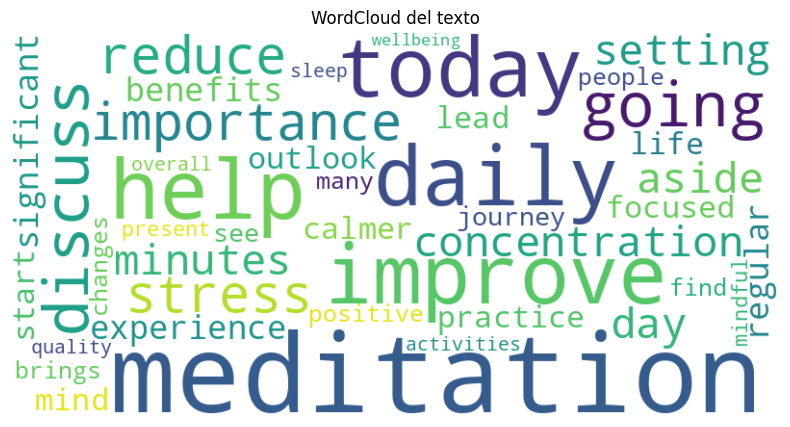

In [11]:
# Texto
texto = """
Today, we are going to discuss the importance of daily meditation. Meditation can help reduce stress and improve concentration. By setting aside just a few minutes each day, you can experience significant benefits. Regular practice can lead to a calmer mind and a more focused outlook on life. Start your meditation journey today and see the positive changes it brings. Many people find that meditation helps them to be more present and mindful in their daily activities. It can also improve sleep quality and overall well-being.
"""

# 1. Limpieza y normalización del texto
def limpiar_texto(texto):
    texto = texto.lower()  # Convertir a minúsculas
    texto = re.sub(r'[^\w\s]', '', texto)  # Eliminar puntuación
    return texto

texto_limpio = limpiar_texto(texto)

# 2. Tokenización del texto
tokens = word_tokenize(texto_limpio)

# 3. Eliminación de stop words
stop_words = set(stopwords.words('english'))
tokens_sin_stopwords = [word for word in tokens if word not in stop_words]

# 4. Extracción del Part-of-Speech (POS)
pos_tags = pos_tag(tokens_sin_stopwords)

# 5. Lemmatización de las palabras y mostrar el DataFrame
lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(word) for word in tokens_sin_stopwords]

df_lemmatized = pd.DataFrame({
    "Palabra": tokens_sin_stopwords,
    "Lematizada": lemmatized_words,
    "POS": [tag for _, tag in pos_tags]
})
print("Lematización y POS:")
print(df_lemmatized)

# 6. Extracción de palabras clave relevantes (sustantivos y adjetivos)
palabras_clave = [word for word, tag in pos_tags if tag in ['JJ', 'NN', 'NNS']]  # Adjetivos y sustantivos

df_palabras_clave = pd.DataFrame({
    "Palabras Clave": palabras_clave
})
print("\nPalabras clave relevantes:")
print(df_palabras_clave)

# 7. Mostrar un WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(tokens_sin_stopwords))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud del texto")
plt.show()

## Codigo Texto (Conversación de WhatsApp)

Lematización y POS:
       Palabra  Lematizada  POS
0        alice       alice   NN
1          hey         hey   NN
2        still       still   RB
3       dinner      dinner   VB
4      tonight     tonight   JJ
5          bob         bob  NNS
6          yes         yes   RB
7   definitely  definitely   RB
8         time        time   NN
9         meet        meet   JJ
10       alice       alice   RB
11           7           7   CD
12          pm          pm   JJ
13         new         new   JJ
14     italian     italian   JJ
15       place       place   NN
16    downtown    downtown   NN
17         bob         bob   NN
18      sounds       sound  VBZ
19     perfect     perfect   JJ
20         ive         ive   JJ
21       heard       heard   NN
22       great       great   JJ
23      things       thing  NNS
24       pasta       pasta   JJ
25       alice       alice   NN
26        cant        cant   NN
27        wait        wait   NN
28         try         try   NN
29         see      

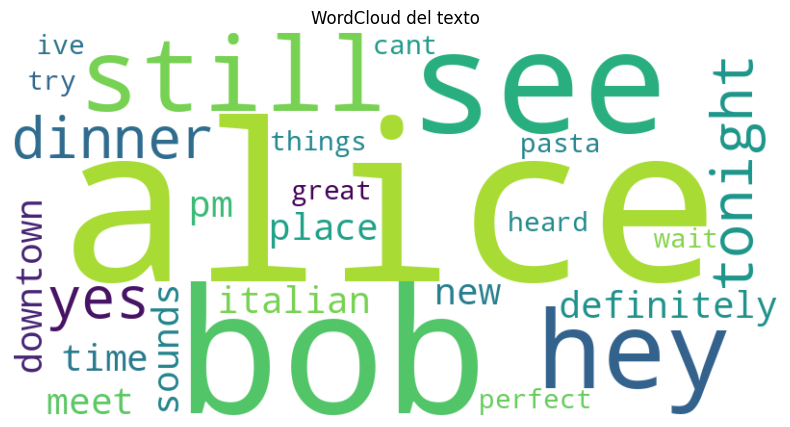

In [12]:
# Texto
texto = """
Alice: Hey, are we still on for dinner tonight ? ?
Bob: Yes, definitely ! ! What time should we meet ?
Alice: How about 7 PM at the new Italian place downtown ?
Bob: Sounds perfect ! I've heard great things about their pasta . . .
Alice: Me too ! ! Can't wait to try it . . . See you there !
Bob: See you ! 😊
"""

# 1. Limpieza y normalización del texto
def limpiar_texto(texto):
    texto = texto.lower()  # Convertir a minúsculas
    texto = re.sub(r'[^\w\s]', '', texto)  # Eliminar puntuación
    return texto

texto_limpio = limpiar_texto(texto)

# 2. Tokenización del texto
tokens = word_tokenize(texto_limpio)

# 3. Eliminación de stop words
stop_words = set(stopwords.words('english'))
tokens_sin_stopwords = [word for word in tokens if word not in stop_words]

# 4. Extracción del Part-of-Speech (POS)
pos_tags = pos_tag(tokens_sin_stopwords)

# 5. Lemmatización de las palabras y mostrar el DataFrame
lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(word) for word in tokens_sin_stopwords]

df_lemmatized = pd.DataFrame({
    "Palabra": tokens_sin_stopwords,
    "Lematizada": lemmatized_words,
    "POS": [tag for _, tag in pos_tags]
})
print("Lematización y POS:")
print(df_lemmatized)

# 6. Extracción de palabras clave relevantes (sustantivos y adjetivos)
palabras_clave = [word for word, tag in pos_tags if tag in ['JJ', 'NN', 'NNS']]  # Adjetivos y sustantivos

df_palabras_clave = pd.DataFrame({
    "Palabras Clave": palabras_clave
})
print("\nPalabras clave relevantes:")
print(df_palabras_clave)

# 7. Mostrar un WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(tokens_sin_stopwords))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud del texto")
plt.show()